# Classifying the Countries by Public vs Private

21
Percentage of Public Titles by Country:
scar: 80.54%
japan: 78.72%
uruguay: 75.41%
sweden: 74.60%
belgium: 74.45%
australia: 74.23%
poland: 73.77%
italy: 71.83%
chile: 70.36%
china: 69.57%
brazil: 68.55%
norway: 67.94%
korea rok: 67.29%
spain: 66.44%
ukraine: 66.13%
new zealand: 64.57%
south africa: 64.20%
india: 63.46%
united kingdom: 63.16%
argentina: 63.05%
france: 62.24%
comnap: 61.69%
germany: 61.38%
united states: 59.35%
russian federation: 55.88%
iaato: 28.63%


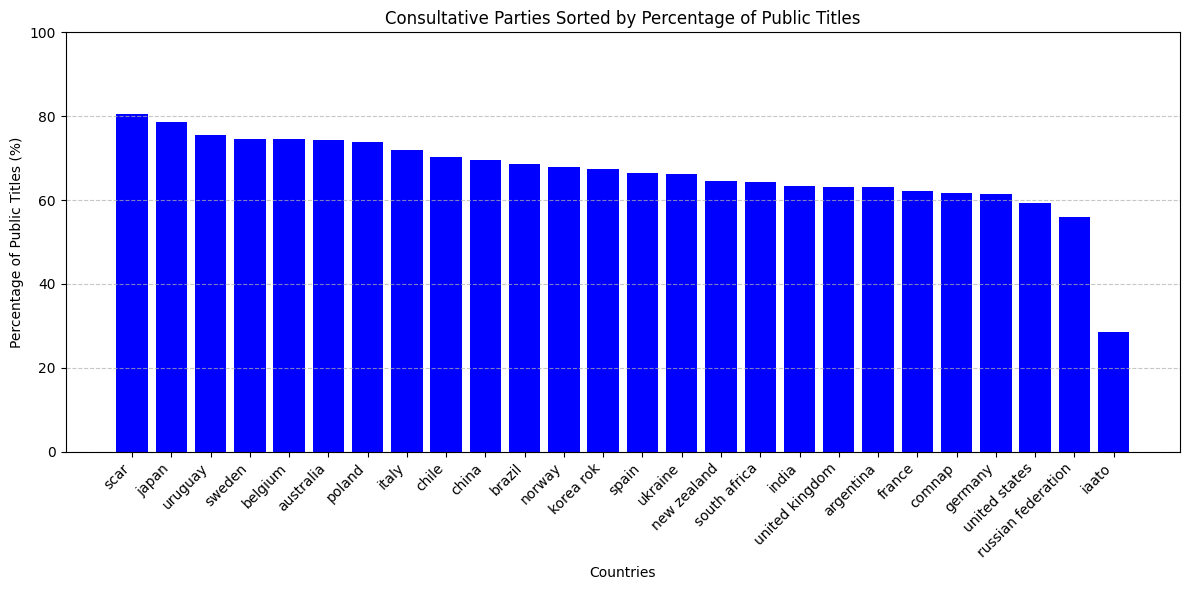

In [42]:
import pandas as pd
import string
from collections import defaultdict
import matplotlib.pyplot as plt

# File paths for dataset and topics
file_path = "ATCMDataset.xlsx"
topics_file_path = "topics.txt"

def clean_text(text):
    """Strips leading/trailing whitespace, removes punctuation, and converts text to lowercase."""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator).strip().lower()

def process_countries(countries_string):
    """Splits countries by commas, cleans each country, and returns a list."""
    if pd.isna(countries_string):  # Handle missing values (NaN)
        return []
    
    # Split by commas and clean each country name
    countries = [clean_text(country) for country in countries_string.split(',')]
    return countries

def read_topics(file_path):
    """Reads the topics.txt file and returns a list of topics and classifications."""
    topics = []
    classifications = []
    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            # Last element is the classification, the rest are topic words
            words = [clean_text(word) for word in parts[:-1]]
            classification = clean_text(parts[-1])
            topics.append(words)
            classifications.append(classification)
    
    return topics, classifications
topics,classifications=read_topics(topics_file_path)

c=0
for i in range(len(classifications)):
    if classifications[i]=='public':
        c+=1
print(c)



def classify_title(title, topics, classifications):
    """Classifies a title based on the number of matching words with each topic."""
    title_words = set(clean_text(title).split())  # Split title into words, cleaned
    
    best_match_count = 0
    best_match_topic = None
    best_match_classification = "UNCLASSIFIED"
    
    # Check against all topics
    for i, topic_words in enumerate(topics):
        match_count = len(title_words.intersection(topic_words))
        
        if match_count > best_match_count:
            best_match_count = match_count
            best_match_topic = topic_words
            best_match_classification = classifications[i]
    
    return best_match_classification if best_match_topic else "UNCLASSIFIED"

def read_dataset(file_path, topics, classifications):
    """Reads the dataset and classifies each title."""
    df = pd.read_excel(file_path)

    # Use 'Submitted By' for countries
    title_col = 'Title'  # Assuming the column name for titles is 'Title'
    countries_col = 'Submitted By'  # Use the correct column for countries

    # Clean titles and countries
    titles = df[title_col].apply(clean_text).tolist()
    countries = df[countries_col].apply(process_countries).tolist()

    classifications_output = []
    
    # Classify each title based on topics
    for title in titles:
        classification = classify_title(title, topics, classifications)
        classifications_output.append(classification)

    return titles, countries, classifications_output

def classify_countries_by_titles(titles, countries, classifications):
    """Assign classifications to each country based on title classifications."""
    # Dictionary to store private and public counts for each country
    country_classifications = defaultdict(lambda: [0, 0])  # [private_count, public_count]

    # Loop over each title, its countries, and its classification
    for title_countries, classification in zip(countries, classifications):
        for country in title_countries:
            if classification == "private":
                country_classifications[country][0] += 1  # Increment private count
            elif classification == "public":
                country_classifications[country][1] += 1  # Increment public count
    
    return country_classifications


# Read topics and classifications
topics, classifications = read_topics(topics_file_path)

# Read the dataset and classify titles
titles, countries, title_classifications = read_dataset(file_path, topics, classifications)

# Classify countries based on the number of private and public titles
country_classification_counts = classify_countries_by_titles(titles, countries, title_classifications)

# Print the results
"""
for country, counts in country_classification_counts.items():
    print(f"Country: {country}, Private Count: {counts[0]}, Public Count: {counts[1]}")
"""
# MAKE PLOT OF COUNTRIES

# List of consultative parties
consultative_parties = [
    'SCAR', 'IAATO', 'COMNAP', 'United States', 'Ukraine', 'Belgium',
    'New Zealand', 'Uruguay', 'Spain', 'Russian Federation', 'Italy',
    'India', 'United Kingdom', 'Brazil', 'Poland', 'Japan', 'Argentina',
    'China', 'Norway', 'South Africa', 'Chile', 'Sweden', 'Australia',
    'Germany', 'France', 'Korea (ROK)'
]

# Strip punctuation, whitespace, and convert to lowercase
cleaned_parties = [
    party.translate(str.maketrans('', '', string.punctuation)).strip().lower() 
    for party in consultative_parties
]

# Calculate percentages of public titles for consultative parties
consultative_percentages = {}

for country, counts in country_classification_counts.items():
    # Convert country name to lowercase for comparison
    country_cleaned = country.translate(str.maketrans('', '', string.punctuation)).strip().lower()
    
    if country_cleaned in cleaned_parties:  # Only include countries in the cleaned list
        public_count = counts[1]
        private_count = counts[0]
        total_count = public_count + private_count
        
        # Avoid division by zero
        if total_count > 0:
            public_percentage = (public_count / total_count) * 100
        else:
            public_percentage = 0  # Assign 0% if there are no titles

        consultative_percentages[country] = public_percentage

# Sort the countries by percentage of public titles
sorted_consultative_countries = sorted(consultative_percentages.items(), key=lambda x: x[1], reverse=True)

# Print the percentage of public titles by country in sorted order
print("Percentage of Public Titles by Country:")
for country, percentage in sorted_consultative_countries:
    print(f"{country}: {percentage:.2f}%")

# Prepare data for plotting
countries = [country for country, _ in sorted_consultative_countries]
percentages = [percentage for _, percentage in sorted_consultative_countries]

# Plotting the column graph only if there are countries to plot
if countries:
    plt.figure(figsize=(12, 6))
    plt.bar(countries, percentages, color='blue')
    plt.xlabel('Countries')
    plt.ylabel('Percentage of Public Titles (%)')
    plt.title('Consultative Parties Sorted by Percentage of Public Titles')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)  # Setting y-axis limit to 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No consultative countries found to plot.")



# Now read the ATCM data for the titles

# Find out which classification each country belongs to: